# Homework 8

**Enter your Name:**  Thomas Lu
    
** Enter your PID:**  thomaslu
    
I have neither given nor received unauthorized assistance on this assignment.

In [1]:
# Run this cell first.  Do NOT edit this cell.
Answer1 = Answer2 = Answer3 = Answer4 = Answer5 = None
import pandas
import numpy
import matplotlib
import matplotlib.pyplot
import sklearn.cluster
import sklearn.manifold
import nose.tools
#%matplotlib notebook
%matplotlib inline
states = pandas.read_csv('states-big.csv') 
survey = pandas.read_csv('Survey-3654-Fall2018-clean.csv')

*Problem 1.*  What are 5 clusters in the States data?  Extract and z-score normalize the meaningful quantitative columns (beginning with the "Area" column) of the states-big￼￼ data.  Then, compute K=5 clusters of states using the KMeans algorithm.

For grading purposes, eliminate the randomness of the initial step of KMeans by initializing the 5 centroids using these data points in this order: 'CA','DC','LA','MT','NH' (hint: 'init' parameter).  Use the default values for all other unspecified parameters.

In Answer1, return a DataFrame containing only 'STATE_NAME' column and 'Cluster' label column, sorted by increasing Cluster label.

In [2]:
# Problem 1
# YOUR CODE HERE
#raise NotImplementedError()

quant = states.iloc[:,6:]
norm = (quant - quant.mean())/quant.std()
#norm

kminits = norm[states.STATE_ABBR.isin(['CA','DC','LA','MT','NH'])]
km = sklearn.cluster.KMeans(n_clusters=5,init=kminits, n_init=1)

labels = km.fit_predict(norm)  # execute kmeans algorithm here
labels = pandas.DataFrame({
    "STATE_NAME": states.STATE_NAME,
    "Cluster": labels
    }
)

Answer1 = labels.sort_values('Cluster',ascending=True)
Answer1
#Answer1

,STATE_NAME,Cluster
43,Texas,0
4,California,0
32,New York,0
8,District of Columbia,1
0,Alabama,2
48,West Virginia,2
42,Tennessee,2
40,South Carolina,2
38,Pennsylvania,2
35,Ohio,2


In [3]:
# autograder -- run me
nose.tools.assert_is_instance(Answer1, pandas.DataFrame)
nose.tools.assert_tuple_equal(Answer1.shape, (51, 2))
nose.tools.assert_list_equal(list(Answer1.columns), ['STATE_NAME', 'Cluster'])
nose.tools.assert_true(Answer1.Cluster.is_monotonic_increasing)
# autograder hidden tests
'passed'

'passed'

*Problem 2.* How can the data be reduced to 2 dimensions?  Use MDS with L2 Euclidean distance to reduce the dimensionality of the same z-scored quantitative columns to 2 dimensions (hint: MDS can compute L2 distances for you).

For grading purposes, eliminate the randomness of the initial step of MDS by initializing the 2 reduced dimensions with the data in columns: 'E_COLGRD_P','INCOME_PC' (hint: 'init' parameter). Set 'eps'=0, 'max_iter'=1000 and 'n_init'=1. Use the default values for all other unspecified parameters.

In Answer2, return a DataFrame containing the 'STATE_NAME' column and the new 'X' and 'Y' columns, sorted by increasing 'Y'.


In [4]:
# Problem 2
# YOUR CODE HERE
#raise NotImplementedError()
mdsinits = norm.loc[:,['E_COLGRD_P','INCOME_PC']]
mds = sklearn.manifold.MDS(n_components=2,dissimilarity='euclidean',eps=0,max_iter=1000,n_init=1)
data2D = mds.fit_transform(norm, init=mdsinits)
xdata = []
ydata = []
for i in range(len(data2D)):
    xdata.append(data2D[i][0])
    ydata.append(data2D[i][1])

labels = pandas.DataFrame({
    "STATE_NAME": states.STATE_NAME,
    "X": xdata,
    "Y": ydata
    }
)
Answer2 = labels.sort_values('Y',ascending=True)
Answer2

,STATE_NAME,X,Y
1,Alaska,4.435943,-11.926843
44,Utah,-4.031569,-7.671860
31,New Mexico,-0.764600,-6.331630
11,Hawaii,6.276235,-4.891665
28,Nevada,2.311693,-4.540137
50,Wyoming,-2.553783,-4.468263
12,Idaho,-3.222062,-3.880425
45,Vermont,0.326956,-3.440400
5,Colorado,1.125908,-3.252721
29,New Hampshire,2.857062,-3.192948


In [5]:
# autograder -- run me
nose.tools.assert_is_instance(Answer2, pandas.DataFrame)
nose.tools.assert_tuple_equal(Answer2.shape, (51, 3))
nose.tools.assert_list_equal(list(Answer2.columns), ['STATE_NAME', 'X', 'Y'])
nose.tools.assert_true(Answer2.Y.is_monotonic_increasing)
# autograder hidden tests
'passed'

'passed'

*Problem 3.* How would you describe the categorization of the states?   Put the previous results together in a visualization.  Draw a scatterplot of the MDS result.  Color the dots by their cluster memberships. (What type of colormap should you use?)  Label each dot with its state abbreviation (hint: axes.text()).  
Compute the 2D cluster centroids of the 2-dimensional X,Y data from MDS, and plot the centroids in the same plot, using the same color scheme, but make the centroids dots much larger than the state dots and give them transparency (alpha).

In Answer3, return the 2D centroids as a DataFrame with columns 'X','Y', indexed and sorted by cluster label. 

Plots will be graded using both autograder and visual inspection.

Think about: Do the clusters overlap? Are the points always nearest to their own centroid? Why might the clusters not necessarily look strictly clustered in the MDS plot?  Hint: think high-dimensionally.

For example, it might look like:
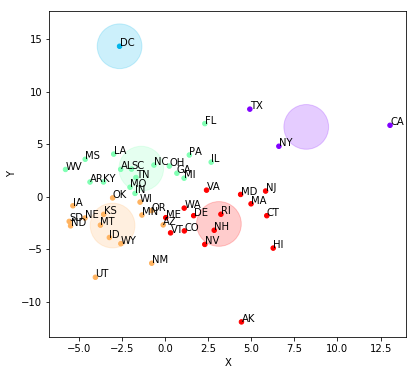

,X,Y
0,-0.592164,-0.984942
1,-2.553783,-4.468263
2,1.513420,-1.566465
3,-0.528424,2.017403
4,0.008647,0.044338


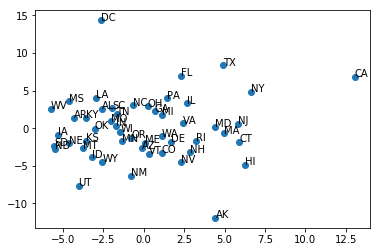

In [13]:
# Problem 3
# YOUR CODE HERE
#raise NotImplementedError()
#matplotlib.pyplot.scatter(Answer2['X'],Answer2['Y'])

Answer2_1 = pandas.DataFrame({
    "X": xdata,
    "Y": ydata,
    "Abbr": states.STATE_ABBR
})
matplotlib.pyplot.scatter(Answer2['X'],Answer2['Y'])
for i,row in Answer2_1.iterrows():
    matplotlib.pyplot.text(row['X'],row['Y'],row['Abbr'])

km3 = sklearn.cluster.KMeans(n_clusters=5)
labels3 = km3.fit_predict(Answer2.iloc[:,1:])
labels3 = pandas.DataFrame(labels3, columns=['Cluster'])
labels3['X'] = Answer2['X']
labels3['Y'] = Answer2['Y']
centroids = (labels3.groupby('Cluster',as_index=False)['X','Y'].mean())
Answer3 = centroids.iloc[:,1:]
Answer3

In [7]:
# autograder -- run me
nose.tools.assert_is_instance(Answer3, pandas.DataFrame)
nose.tools.assert_tuple_equal(Answer3.shape, (5, 2))
nose.tools.assert_list_equal(list(Answer3.columns), ['X', 'Y'])
nose.tools.assert_list_equal(list(Answer3.index), [0,1,2,3,4])
# autograder hidden tests
'passed'

'passed'

*Problem 4.* Is there a natural number of clusters for the States data?  Conduct an "elbow" analysis by re-running the KMeans with all possible values of K. Display a line plot, with circle markers, of 'total within-cluster variance' (kmeans.inertia_ ) as a function of K.  To get good results, you will want to use the default init='k-means++' parameter. For reasonable running times, use n_init=3 and max_iter=20.

In Answer4, return the results as a DataFrame with columns 'K' and 'Inertia', sorted by increasing K. 

Reminder: An elbow plot looks like this:
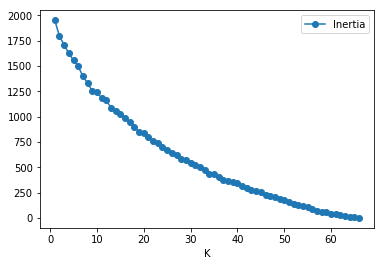

,K,Inertia
0,1,1750.000000
1,2,1437.971886
2,3,1156.567531
3,4,979.689251
4,5,878.064122
5,6,714.865447
6,7,668.855355
7,8,559.732512
8,9,518.206648
9,10,492.054146


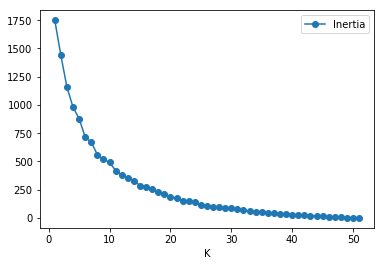

In [8]:
# Problem 4
# YOUR CODE HERE
#raise NotImplementedError()
arr1 = []
arr2 = []
for i in range(1, 52):
    k = sklearn.cluster.KMeans(n_clusters=i, init = 'k-means++', n_init=3, max_iter=20)
    k.fit_predict(norm)
    ine = k.inertia_
    arr1.append(i)
    arr2.append(ine)
df = pandas.DataFrame(data=arr1, columns=['K'])
df2 = pandas.DataFrame(data=arr2, columns=['Inertia'])
df['Inertia'] = df2['Inertia']
Answer4 = df
Answer4.plot(x='K', y='Inertia',marker='o')
Answer4

In [9]:
# autograder -- run me
nose.tools.assert_is_instance(Answer4, pandas.DataFrame)
nose.tools.assert_tuple_equal(Answer4.shape, (51, 2))
nose.tools.assert_list_equal(list(Answer4.columns), ['K', 'Inertia'])
nose.tools.assert_list_equal(list(Answer4.K), list(range(1,52)))
# autograder hidden tests
'passed'

'passed'

*Problem 5.*  Complete the following sentence: "There are two kinds of people in the world (well, in our class anyway), ..."  How would you describe those two kinds of people?

Using the Survey data, eliminate the Faculty member, z-score normalize the quantitative data, and then use KMeans and Parallel Coordinates visualization of centroids to find the answer.
Hint:  Use clustering, and find out what is most different about their centroids.  Rerun your analysis several times to see what columns are most consistently most different.  Since this data is more complex, use n_init=100, max_iter=100.  Visually justify your claim with a Parallel Coordinates plot of the z-score centroids.
Hint:  This problem is very similar to Problem 3. Before, your cluster solution had five centroids and two attributes; here you will have two centroids and 30 attributes.

In Answer5, return a Series, indexed by the quantitative column names, containing the absolute-value difference between the z-score centroids, sorted in decreasing magnitude.

Football        1.396870
Cook            1.169521
Awake           0.987999
Birthday        0.981272
Height          0.949454
Camping         0.767966
States          0.737236
DistanceBorn    0.731695
Programming     0.673409
Photos          0.617598
Languages       0.589960
YearsVT         0.568040
BedTime         0.483114
Facebook        0.433290
Temperature     0.432462
Spender         0.420933
Siblings        0.411301
PhoneMins       0.385713
Age             0.300476
Homes           0.286663
Countries       0.269311
Books           0.259186
HardDrive       0.259152
Spicy           0.249315
Extrovert       0.200846
Mac             0.199394
Math            0.154297
PhoneApps       0.142518
Smoothies       0.128376
Pets            0.102502
dtype: float64

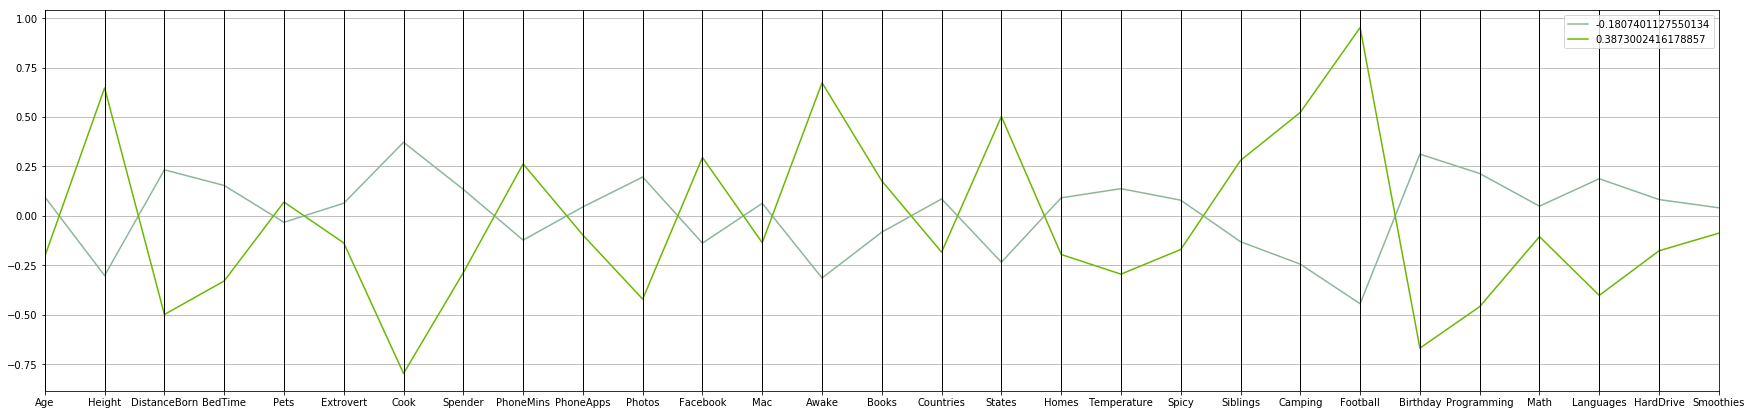

In [10]:
# Problem 5
# YOUR CODE HERE
#raise NotImplementedError()
survey2 = survey.drop([64])
quant5 = survey.iloc[:,4:]
norm5 = (quant5 - quant5.mean())/quant5.std()
km5 = sklearn.cluster.KMeans(n_clusters=2,n_init=100,max_iter=100)
labels5=km5.fit_predict(norm5)
labels5=pandas.DataFrame(labels5,columns=['Cluster'])
centroids = pandas.DataFrame(km5.cluster_centers_,columns=norm5.columns)

arr5 = []
diff = abs(centroids.diff())
for i in diff:
    arr5.append(diff[i][1])
s = pandas.Series(arr5,diff.columns.values)
s = s.sort_values(ascending=False)

%matplotlib inline
fig = matplotlib.pyplot.figure(figsize=(30,7))
pandas.plotting.parallel_coordinates(centroids,'YearsVT')
Answer5 = s
Answer5

In [11]:
# autograder -- run me
nose.tools.assert_is_instance(Answer5, pandas.Series)
nose.tools.assert_tuple_equal(Answer5.shape, (30,))
nose.tools.assert_equal(Answer5.dtype, 'float64')
nose.tools.assert_true(Answer5.is_monotonic_decreasing)
# autograder hidden tests
'passed'

'passed'

In [12]:
# scratch space
